<h1>Cyberbullying detection</h1>
<hr>
<h3>Preprocessing</h3>
<hr>

In [20]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from collections import defaultdict
from nltk.stem import WordNetLemmatizer 

from nltk.corpus import stopwords
from cleantext import clean

from collections import  Counter
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim

%matplotlib inline

<hr>
read the dataset
<hr>

In [2]:
df_cbd = pd.read_csv('../datasets/twitter_parsed_dataset_post_EDA.csv')

In [3]:
df_cbd.shape

(16851, 5)

Drop those 3 rows with null values detected on EDA stage.

In [4]:
df_cbd[df_cbd['id'].isnull() | df_cbd['text'].isnull() | df_cbd['annotation'].isnull()] 

,index,id,text,annotation,oh_label
2992,5.67909969783169E+017,5.67909969783169E+017,RT @Lizzethismetal: Probably gonna piss off so...,NaN,NaN
2993,#yesallmen,NaN,NaN,NaN,NaN
2994,@MT8_9 http://t.co/QHo6dhumjc,sexism,1,NaN,NaN


In [5]:
df_cbd.drop(df_cbd[df_cbd['id'].isnull() | df_cbd['text'].isnull() | df_cbd['annotation'].isnull()].index,axis=0,inplace=True)
df_cbd.shape

(16848, 5)

Start to remove some text like: http tag, punctuations, special characters

In [6]:
#remove url's
df_cbd['text'] = df_cbd['text'].map(lambda x : re.sub(r"\S*https?:\S*", '', x))

In [7]:
#remove RT mark
df_cbd['text'] =df_cbd['text'].map(lambda x : re.sub(r"^RT @*", '', x))

In [8]:
#remove punctuaction marks and special characters
df_cbd['text']=df_cbd['text'].map(lambda x : re.sub(r"[!\"#$%&\'()*+,-./:;=>?@[\]^_`{|}~]*", '', x))

I'm going to eliminate emojis with clean-text

In [9]:
df_cbd['text']=df_cbd['text'].map(lambda x : clean(x, no_emoji=True))

C:\Users\hmorales\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\cleantext\clean.py:59: DeprecationWarning: invalid escape sequence '\o'
  text = text.encode().decode("unicode-escape")
C:\Users\hmorales\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\cleantext\clean.py:59: DeprecationWarning: invalid escape sequence '\ '
  text = text.encode().decode("unicode-escape")
C:\Users\hmorales\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\cleantext\clean.py:59: DeprecationWarning: invalid escape sequence '\ '
  text = text.encode().decode("unicode-escape")


Now I'm going to eliminate the stopwords, those wich were identify in EDA stage

In [11]:
#create an array of english stopwords
stop=set(stopwords.words('english'))

In [12]:
df_cbd['text'] = df_cbd['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [13]:
df_cbd.head(20)

,index,id,text,annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,halalflaws biebervalue greenlinerzjm read cont...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,shreyabafna3 idiots claim people tried stop be...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,mooseoftorment call sexist go auto place id ra...,sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,g0ssipsquirrelx wrong isis follows example moh...,racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,mkr,none,0.0
5,5.61184804004041E+017,5.61184804004041E+017,trobinsonnewera saudi preacher raped tortured ...,none,0.0
6,4.36563082093949E+017,4.36563082093949E+017,millhouse66 maureenjs nooo sexist women bad dr...,sexism,1.0
7,5.75962326454641E+017,5.75962326454641E+017,going make pancakesdont hve strawberries hve b...,none,0.0
8,5.72581510248706E+017,5.72581510248706E+017,ahtweet freebsdgirl dare feelings fantastic wa...,none,0.0
9,5.00456367719989E+017,5.00456367719989E+017,newmanzaa theres something wrong girl wins way...,sexism,1.0


## Lemmatization
the process of converting a word to its base form. Lemmatization considers the context and converts the word to its meaningful base form.

In [14]:
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [15]:
df_cbd['text'] = df_cbd['text'].apply(lambda x: lemmatizer.lemmatize(x))

In [19]:
df_cbd['text']

0        halalflaws biebervalue greenlinerzjm read cont...
1        shreyabafna3 idiots claim people tried stop be...
2        mooseoftorment call sexist go auto place id ra...
3        g0ssipsquirrelx wrong isis follows example moh...
4                                                      mkr
                               ...                        
16846    feeling sorry girls safe kat andre going home mkr
16847    mkr pretty good dishes happy ok well im never ...
16848    colonelkickhead deconstructed lemon tartcan pl...
16849    versacezaynx nyazpolitics greenlinerzjm stupid...
16850    protest youre mad theres much reason youd twee...
Name: text, Length: 16848, dtype: object

finally, what is the final state of the dataset?

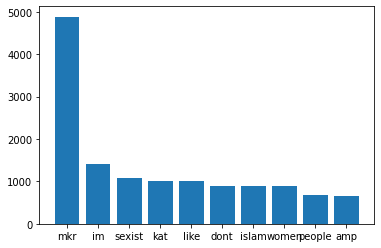

In [21]:
#create a bar plot to show the most common words
def plot_top_words_barchart(text):
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    
    dic=defaultdict(int)
    for word in corpus:
        dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)


plot_top_words_barchart(df_cbd['text'])

In [22]:
def plot_wordcloud(text):
    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

C:\Users\hmorales\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\hmorales\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\hmorales\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\hmorales\AppD

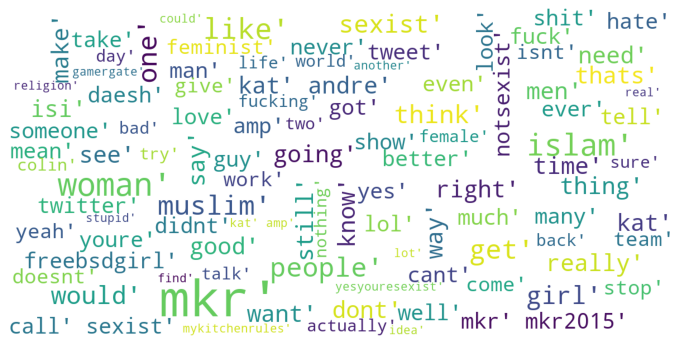

In [23]:
plot_wordcloud(df_cbd['text'])

Save the dataset for modeling

In [29]:
df_cbd.to_csvS('../datasets/twitter_parsed_dataset_post_cleaning.csv', index=False)